### IMPORT PACKAGES

In [1]:
import os
import time
import pandas as pd
from selenium.webdriver import Chrome
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support.ui import WebDriverWait as WDW
from selenium.webdriver.support import expected_conditions as EC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score
from sklearn.feature_extraction.text import TfidfVectorizer
#!pip install torch --use-feature=2020-resolver
from underthesea import word_tokenize
from xlrd import open_workbook
import matplotlib.pyplot as plt
%matplotlib inline

### TASK 1: COLLECTING DATA

#### 1.1 Functions to Get data from 3 Youtube Videos (Khoa Pug)

In [2]:
# Create ChromeDriver to executable that Selenium WebDriver uses to control Chrome
def ChromeDriver(url,t):
    data = []
    with Chrome(executable_path = r'./chromedriver') as ChD:
        wait = WDW(ChD,t)
        ChD.get(url)
        for item in range(101): 
            wait.until(EC.visibility_of_element_located((By.TAG_NAME, "body"))).send_keys(Keys.END)
            time.sleep(t)
        for comment in wait.until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, "#content"))):
            if(len(str(comment.text))>10): # Do not accept short comment or doesn't mean much
                data.append(comment.text)
            if(len(data)==103): # 100 comments + 3(title,description,first comment of Khoa Pug)
                break
    return data

def getData_Video(url,t):
    data = ChromeDriver(url,t)
    while(len(data)==103):
        for i in range(3): # Remove 3(title,description,first comment of Khoa Pug)
            data.pop(0)
        print("Success!! Crawled 100 comments from Video [" + url.split("v=")[1] + "]!")
        return data
    print("Failed!! Please try again.")
    return data

#### 1.2 Choose 3 Videos and Make storageDir

In [3]:
url1 = "https://www.youtube.com/watch?v=hassqXTvsXM"
url2 = "https://www.youtube.com/watch?v=RG-dXrbRNuw"
url3 = "https://www.youtube.com/watch?v=ipSpPzFqNH0"

storageDir = "dataList/"
if not os.path.exists(storageDir):
    os.makedirs(storageDir)

#### 1.3 Crawling 100 comments

In [4]:
data1 = getData_Video(url1,0.035)

Success!! Crawled 100 comments from Video [hassqXTvsXM]!


In [5]:
data2 = getData_Video(url2,0.040)

Success!! Crawled 100 comments from Video [RG-dXrbRNuw]!


In [6]:
data3 = getData_Video(url3,0.025)

Success!! Crawled 100 comments from Video [ipSpPzFqNH0]!


#### 1.4 Label these comments by yourself in 7 classes

In [7]:
DG = "Disgust"
EJ = "Enjoyment"
AG = "Anger"
SP = "Surprise"
SN = "Sadness"
FE = "Fear"
OT = "Other"

emotion1 = [
    OT,EJ,EJ,OT,OT,SN,SN,OT,EJ,EJ,
    SP,EJ,EJ,OT,OT,OT,EJ,OT,EJ,EJ,
    SP,EJ,EJ,OT,SP,OT,EJ,EJ,EJ,OT,
    EJ,EJ,EJ,OT,OT,OT,SN,OT,EJ,DG,
    EJ,EJ,EJ,EJ,EJ,EJ,OT,OT,EJ,EJ,
    EJ,FE,EJ,OT,OT,OT,EJ,OT,EJ,OT,
    OT,SP,SP,OT,OT,EJ,EJ,OT,EJ,EJ,
    DG,SP,AG,OT,OT,EJ,OT,SN,EJ,EJ,
    OT,EJ,EJ,EJ,OT,EJ,OT,FE,EJ,EJ,
    EJ,OT,OT,SP,OT,OT,DG,OT,EJ,OT
]
emotion2 = [
    OT,EJ,SN,EJ,SP,OT,OT,FE,OT,EJ,
    SP,EJ,EJ,AG,OT,OT,SN,EJ,OT,OT,
    OT,EJ,SN,EJ,EJ,DG,OT,OT,EJ,EJ,
    EJ,EJ,EJ,SN,OT,OT,EJ,EJ,EJ,OT,
    SN,OT,EJ,EJ,EJ,EJ,OT,EJ,OT,OT,
    OT,OT,EJ,EJ,OT,OT,EJ,OT,OT,OT,
    OT,EJ,EJ,EJ,EJ,EJ,OT,OT,EJ,EJ,
    EJ,OT,OT,OT,OT,SN,OT,EJ,EJ,EJ,
    OT,OT,EJ,OT,OT,EJ,EJ,SP,FE,OT,
    OT,OT,EJ,OT,OT,EJ,OT,OT,OT,EJ
]
emotion3 = [
    OT,OT,EJ,OT,OT,EJ,OT,EJ,FE,FE,
    EJ,EJ,SP,SP,SN,OT,EJ,OT,OT,EJ,
    EJ,FE,SN,EJ,OT,OT,EJ,EJ,FE,EJ,
    SN,EJ,EJ,OT,EJ,FE,SN,OT,EJ,OT,
    SN,EJ,EJ,SN,EJ,EJ,SN,OT,EJ,EJ,
    OT,FE,SN,AG,OT,OT,EJ,OT,EJ,OT,
    OT,SP,SP,OT,SN,EJ,EJ,SN,OT,OT,
    SP,SP,EJ,OT,OT,EJ,OT,OT,DG,SN,
    OT,AG,EJ,EJ,OT,SN,SP,FE,SN,EJ,
    EJ,EJ,EJ,OT,OT,SP,FE,SP,EJ,FE
]

#### 1.5 Write data to CSV

In [8]:
dataList1 = {"Emotion": emotion1, "Sentence": data1}

df1 = pd.DataFrame(dataList1)
df1.to_csv(storageDir + "dataList1.csv", encoding = "utf-8-sig")
df1.head()

,Emotion,Sentence
0,Other,Số người mún ah Khoa cho xem mặt cameraman dựa...
1,Enjoyment,Kết mỗi câu :” Hầu như mọi người trên thế giới...
2,Enjoyment,9:30 giống trẻ trâu ai cập
3,Other,Ổng nói tiếng Anh mà giống tiếng Việt nghe mắc...
4,Other,""" mình ăn cho ông ấy biết mặt Việt Nam"". Anh ạ..."


In [9]:
dataList2 = {"Emotion": emotion2, "Sentence": data2}

df2 = pd.DataFrame(dataList2)
df2.to_csv(storageDir + "dataList2.csv", encoding = "utf-8-sig")
df2.head()

,Emotion,Sentence
0,Other,Review về Dubai đi anh Khoa. Ai đồng ý xin 1 l...
1,Enjoyment,Nhìn ổng review đồ ăn mà mình chỉ biết ngậm ng...
2,Sadness,Lao động nghèo như mình k bk chừng nào ngặm dc...
3,Enjoyment,T mắc cười khúc đầu bếp chào xong cái ông Khoa...
4,Surprise,Khách hàng được phụ vụ như thượng đế!\nMột câu...


In [10]:
dataList3 = {"Emotion": emotion3, "Sentence": data3}

df3 = pd.DataFrame(dataList3)
df3.to_csv(storageDir + "dataList3.csv", encoding = "utf-8-sig")
df3.head()

,Emotion,Sentence
0,Other,"ở ấn độ có người nhiễm cúm corona rồi đó, ko t..."
1,Other,"10tr lượt view rồi, thời đến đỡ ko kịp"
2,Enjoyment,Ôi bình yên. K ai nghĩ 1 năm sau đại họa sảy r...
3,Other,Số người 2021 xem lại vì nghe tin thảm họa cov...
4,Other,Ai vẫn còn xem điểm danh nào


#### 1.6 Read data from CSV

In [11]:
dataList1 = pd.read_csv(storageDir + "dataList1.csv", encoding = "utf8")
dataList2 = pd.read_csv(storageDir + "dataList2.csv", encoding = "utf8")
dataList3 = pd.read_csv(storageDir + "dataList3.csv", encoding = "utf8")

#### 1.7 Remove redundant attributes

In [12]:
dataList1.pop("Unnamed: 0")
dataList2.pop("Unnamed: 0")
dataList3.pop("Unnamed: 0")

0      0
1      1
2      2
3      3
4      4
      ..
95    95
96    96
97    97
98    98
99    99
Name: Unnamed: 0, Length: 100, dtype: int64

#### 1.8 Add column length of sentence

In [13]:
lengthDataList1 = []
lengthDataList2 = []
lengthDataList3 = []
for i in range(100):
    lengthDataList1.append(len(dataList1.Sentence[i]))
    lengthDataList2.append(len(dataList2.Sentence[i]))
    lengthDataList3.append(len(dataList3.Sentence[i]))

dataList1["Length"] = lengthDataList1
dataList2["Length"] = lengthDataList2
dataList3["Length"] = lengthDataList3

dataList1.head()

,Emotion,Sentence,Length
0,Other,Số người mún ah Khoa cho xem mặt cameraman dựa...,58
1,Enjoyment,Kết mỗi câu :” Hầu như mọi người trên thế giới...,95
2,Enjoyment,9:30 giống trẻ trâu ai cập,26
3,Other,Ổng nói tiếng Anh mà giống tiếng Việt nghe mắc...,69
4,Other,""" mình ăn cho ông ấy biết mặt Việt Nam"". Anh ạ...",104


In [14]:
dataList2.head()

,Emotion,Sentence,Length
0,Other,Review về Dubai đi anh Khoa. Ai đồng ý xin 1 l...,75
1,Enjoyment,Nhìn ổng review đồ ăn mà mình chỉ biết ngậm ng...,120
2,Sadness,Lao động nghèo như mình k bk chừng nào ngặm dc...,170
3,Enjoyment,T mắc cười khúc đầu bếp chào xong cái ông Khoa...,99
4,Surprise,Khách hàng được phụ vụ như thượng đế!\nMột câu...,145


In [15]:
dataList3.head()

,Emotion,Sentence,Length
0,Other,"ở ấn độ có người nhiễm cúm corona rồi đó, ko t...",150
1,Other,"10tr lượt view rồi, thời đến đỡ ko kịp",38
2,Enjoyment,Ôi bình yên. K ai nghĩ 1 năm sau đại họa sảy r...,99
3,Other,Số người 2021 xem lại vì nghe tin thảm họa cov...,85
4,Other,Ai vẫn còn xem điểm danh nào,28


#### 1.9 Show Histogram Graph & Pie Chart

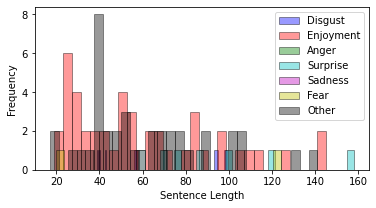

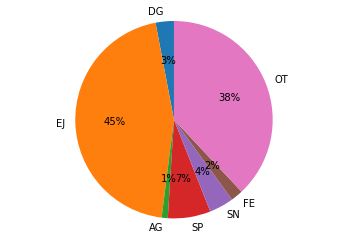

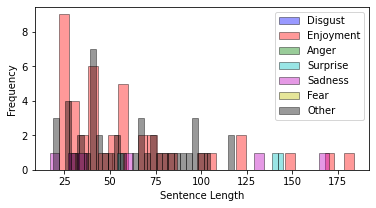

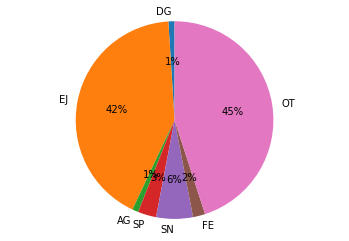

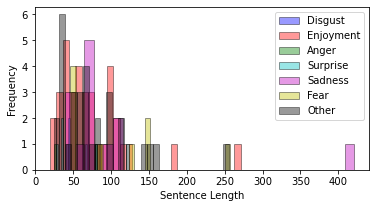

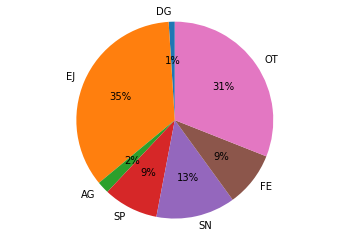

In [16]:
def Show_HistGraph_And_PieChart(dataList):
    E_DG = dataList.loc[dataList.Emotion == DG, 'Length']
    E_EJ = dataList.loc[dataList.Emotion == EJ, 'Length']
    E_AG = dataList.loc[dataList.Emotion == AG, 'Length']
    E_SP = dataList.loc[dataList.Emotion == SP, 'Length']
    E_SN = dataList.loc[dataList.Emotion == SN, 'Length']
    E_FE = dataList.loc[dataList.Emotion == FE, 'Length']
    E_OT = dataList.loc[dataList.Emotion == OT, 'Length']
    
    # Histogram Graph
    config = dict(alpha=0.4, bins=30, edgecolor = "black")
    plt.figure(figsize=(6,3))
    plt.hist(E_DG, **config, color = 'b', label = 'Disgust')
    plt.hist(E_EJ, **config, color = 'r', label = 'Enjoyment')
    plt.hist(E_AG, **config, color = 'g', label = 'Anger')
    plt.hist(E_SP, **config, color = 'c', label = 'Surprise')
    plt.hist(E_SN, **config, color = 'm', label = 'Sadness')
    plt.hist(E_FE, **config, color = 'y', label = 'Fear')
    plt.hist(E_OT, **config, color = 'k', label = 'Other')
    plt.ylabel('Frequency')
    plt.xlabel('Sentence Length')
    plt.legend();
    
    # Pie Chart
    Pie = [len(E_DG),len(E_EJ),len(E_AG),len(E_SP),len(E_SN),len(E_FE),len(E_OT)]
    f, Ax = plt.subplots()
    Ax.pie(Pie, labels=['DG','EJ','AG','SP','SN','FE','OT'], autopct='%1.0f%%', startangle=90)
    Ax.axis('equal')

Show_HistGraph_And_PieChart(dataList1)
Show_HistGraph_And_PieChart(dataList2)
Show_HistGraph_And_PieChart(dataList3)

### TASK 2: EMOTION RECOGNITION FOR VIETNAMESE SOCIAL MEDIA TEXT

#### 2.1 Read data from UIT-VSMEC

In [17]:
# 5548
dataTrainUIT = open_workbook("UIT-VSMEC/train_nor_811.xlsx", encoding_override='latin')
dataTrainUIT = pd.read_excel(dataTrainUIT)
# 686
dataValidUIT = open_workbook("UIT-VSMEC/valid_nor_811.xlsx", encoding_override='latin')
dataValidUIT = pd.read_excel(dataValidUIT)
# 693
data_TestUIT = open_workbook("UIT-VSMEC/test_nor_811.xlsx", encoding_override='latin')
data_TestUIT = pd.read_excel(data_TestUIT)

# Model
model = DecisionTreeClassifier()

# Y
trainY = dataTrainUIT.Emotion
validY = dataValidUIT.Emotion
testY  = data_TestUIT.Emotion

#### 2.2 Text preprocess (stopword, word segmentation, learn vocabulary and idf)

In [18]:
def text_process(datasets):
    # Stopwords
    StopWords = [
        'chs','cerrrr','aaaaa','aaaaaaa','aamir','abcxyz','ac','18','200','500','dek','thg','đg','đs','đm','đuma',
        'vl','vcl','kkk','dcm','cu','ừm','đĩ','đụ','địt','xl','lol','01','10','100', '11','12','13','14','15','150',
        '17','1700''1967','20','21','22','225','23','24','25','26','28','2_','2_3','30','300','3000','320','333',
        '33333','40','400','42','45','48', '50','5000','580','60','63','66','75','78','80','800','81','850','90','900',
        '99','99999','_200','_5','ah','bn','c3','chg','cp','dòg','hlin','lòn','lôz','tđ','đkm','đkmm','đmaaaa','đmm',
        'đmmmmm','đỹ','vcb','vclll','đụ_mẹ','trươ','trưen','amir','ga','1700','1967','bg','chaiii','clm','cmm','cmnl','cã',
        'hloz','imdb','kau','kbh','loz','lozzz','lozzzz','matlon','muô','nh','nhma','p30','16','250','56','adm','ngươ'
    ]
    Tfidf = TfidfVectorizer(stop_words = StopWords)
    
    # Word Segmentation
    WordSeg = []
    for i in range(datasets.shape[0]):
        sentence_strip = datasets.Sentence[i].strip() # Remove spaces at begin & end
        WordSeg.append(word_tokenize(sentence_strip, format='text')) # format text: add "_" where text is phrases.
    datasets.Sentence = WordSeg # Update new sentences
    
    # Learn vocabulary and idf.
    X = Tfidf.fit_transform(datasets.Sentence)
    # Display after processing
    print(Tfidf.get_feature_names()); print("\n\n")
    # return document-term matrix after processing
    return X



#### 2.3 Using Train&Valid sets of UIT-VSMEC for training Emotion Recognition model

In [19]:
trainY = pd.Series(trainY, name="Emotion").to_frame()
validY = pd.Series(validY, name="Emotion").to_frame()

trainValidX = pd.concat([dataTrainUIT, dataValidUIT]).reset_index(drop=True)
trainValidX = text_process(trainValidX)
trainValidY = pd.concat([trainY, validY]).reset_index(drop=True)

trainX, testX, trainY, testY = train_test_split(trainValidX, trainValidY, test_size=0.33, random_state=42)
model = model.fit(trainX, trainY)
predY = model.predict(testX)


['2000', '2012', '2015', '2016', '2019', '2020', '2021', '_ban', '_khẩu', '_mai', '_mong', '_pháp', '_tiên', '_toàn', '_tế', '_ích_kỉ', 'aaaa', 'ad', 'add', 'adim', 'admin', 'ae', 'aeon', 'agri', 'agribank', 'ahahahaha', 'ahihi', 'ahuhu', 'ahuhuhu', 'ai', 'ai_dè', 'ai_ngờ', 'aiii', 'aiyo', 'ak', 'all', 'alo', 'am', 'am_hiểu', 'an', 'an_ninh', 'an_toàn', 'an_tâm', 'an_ủi', 'and', 'anh', 'anh_chị', 'anh_chị_em', 'anh_em', 'anh_hùng', 'anh_trai', 'anime', 'anw', 'app', 'au', 'aumobile', 'auto', 'ava', 'avatar', 'avenger', 'aw', 'awwww', 'axit', 'axít', 'ay', 'azz', 'ba', 'ba_má', 'ba_mẹ', 'babe', 'bai', 'balo', 'ban', 'ban_tặng', 'banh', 'banking', 'bankon', 'bao', 'bao_biện', 'bao_che', 'bao_cấp', 'bao_dai', 'bao_dung', 'bao_giờ', 'bao_lâu', 'bao_nhiêu', 'bao_tay', 'bao_xa', 'bar', 'bat', 'baton', 'bay', 'bb', 'bcs', 'be', 'bede', 'beep', 'ben', 'beng', 'best', 'bh', 'bi', 'bi_đát', 'bia', 'bieber', 'biet', 'bim', 'binh', 'bit', 'biê', 'biên', 'biên_chế', 'biến', 'biến_dạng', 'biến_thái'

#### 2.3 Performance metrics (Accuracy, F1-score…) for the test sets in UIT-VSMEC

In [20]:
Accuracy  = []
Precision = []
F1_Score  = []

Accuracy.append(accuracy_score(testY, predY))
F1_Score.append(f1_score(testY, predY, average='weighted'))  # Could change to None,'weighted','micro','macro'
Precision.append(precision_score(testY, predY, average='weighted'))

averageAccuracy = sum(Accuracy)/len(Accuracy)
print("Average of Accuracy:", averageAccuracy)
averageF1_Score = sum(F1_Score)/len(F1_Score)
print("Average of F1_Score:", averageF1_Score)
averagePrecision = sum(Precision)/len(Precision)
print("Average of Precision:", averagePrecision)

Average of Accuracy: 0.358600583090379
Average of F1_Score: 0.35792786624529066
Average of Precision: 0.358923368012908


### TASK 3: APPLYING THE TRAINED MODEL IN TASK 2 TO THREE DATASETS IN TASK 1

#### 3.1 Applying the trained model in Task 2 to three datasets in Task 1

In [21]:
dataListY1 = dataList1.Emotion
dataListY2 = dataList2.Emotion
dataListY3 = dataList3.Emotion

dataListX1 = text_process(dataList1)
trainX1, testX1, trainY1, testY1 = train_test_split(dataListX1, dataListY1, test_size=0.33, random_state=42)
model = model.fit(trainX1, trainY1)
predY1 = model.predict(testX1)

dataListX2 = text_process(dataList2)
trainX2, testX2, trainY2, testY2 = train_test_split(dataListX2, dataListY2, test_size=0.33, random_state=42)
model = model.fit(trainX2, trainY2)
predY2 = model.predict(testX2)

dataListX3 = text_process(dataList3)
trainX3, testX3, trainY3, testY3 = train_test_split(dataListX3, dataListY3, test_size=0.33, random_state=42)
model = model.fit(trainX3, trainY3)
predY3 = model.predict(testX3)

['00', '19', '27', '29', '33', '34', '43', '44', '_anh', '_chất', '_khoa', '_mến', '_yêu', 'ae', 'ahhah', 'ai', 'anh', 'anh_hùng', 'aroma', 'back', 'bay', 'biết', 'bà', 'bài', 'bát', 'béo', 'bên', 'bón', 'bạn', 'bả', 'bắm', 'bể', 'bị', 'bốc', 'bộ', 'bờ', 'bụi', 'bụng', 'bửa', 'camera', 'cameraman', 'cameramen', 'canada', 'cao', 'cao_số', 'caramel', 'caramen', 'chiến_tranh', 'cho', 'chuyến', 'chuẩn', 'chào_hỏi', 'chào_khoa', 'chân', 'chém', 'chén', 'chú', 'chúc', 'chơi', 'chưa', 'chạy', 'chảy', 'chấm', 'chất', 'chắc', 'chỉ', 'chị', 'chịu', 'chớt', 'chủ', 'chủ_tịch', 'chứ', 'clip', 'clips', 'coi', 'con', 'cute', 'càng', 'càng_ngày_càng', 'cá', 'các', 'cái', 'cân_nhắc', 'câu', 'còn', 'có', 'có_thể', 'cô', 'công_nhận', 'công_phượng', 'cùng', 'cũ', 'cũng', 'cơ_mà', 'cơm', 'cưng', 'cười', 'cười_cười', 'cường_lực', 'cạnh', 'cả', 'cảm_giác', 'cảm_thấy', 'cảnh_sát', 'cấp', 'cầm', 'cần', 'cập', 'cậu', 'cớ', 'của', 'củng', 'cứ', 'cứng', 'dang', 'dao', 'do', 'du', 'du_lịch', 'dubai', 'dành', 'dân_

['00', '19', '2021', '59', '_nhớ', '_thương', '_vl', '_youtube', 'a_khoa', 'ae', 'ai', 'ai_cập', 'anh', 'anh_em', 'ađ', 'banh', 'bao_giờ', 'bay', 'bh', 'biên', 'biến', 'biết', 'black_hole', 'bug', 'bác', 'bánh', 'báo_chí', 'bây', 'bây_giờ', 'bây_h', 'bên', 'bình_an', 'bình_yên', 'bíp', 'bít', 'bùng', 'bùng_phát', 'bạn', 'bảo_trọng', 'bằng', 'bệnh', 'bị', 'bịch', 'bỏ_xa', 'bố_mẹ', 'bức_xúc', 'camera', 'cameraman', 'can_đảm', 'cao_sang', 'caramen', 'ch', 'chi_chít', 'cho', 'chán', 'chân_thật', 'chín', 'chóng_mặt', 'chú', 'chúc', 'chơi', 'chảnh', 'chảo', 'chắc', 'chẳng', 'chết', 'chỉ', 'chị', 'chịu', 'chỗ', 'chớ', 'chời', 'chục', 'chủ_đề', 'chứ', 'clip', 'coi', 'con', 'con_người', 'corona', 'cov', 'covid', 'covit', 'cuộc_sống', 'cá_nhân', 'các', 'cách', 'cái', 'cám_ơn', 'còi', 'còn', 'có', 'có_lẽ', 'có_thể', 'có_vẻ', 'cô', 'công_việc', 'cúm_corona', 'căng', 'cũng', 'cả', 'cảm_thấy', 'cảm_tạ', 'cảm_ơn', 'cảnh', 'cấm', 'cầu', 'cầu_mong', 'cẩn_thận', 'cập', 'cố', 'cổ_đại', 'cớ', 'của', 'cứ',

#### 3.2 Performance metrics (Accuracy, F1-score…) for these datasets

In [22]:
Accuracy1  = []
Precision1 = []
F1_Score1  = []

Accuracy1.append(accuracy_score(testY1, predY1))
F1_Score1.append(f1_score(testY1, predY1, average='micro'))  # Could change to None,'weighted','micro','macro'
Precision1.append(precision_score(testY1, predY1, average='micro'))

averageAccuracy1 = sum(Accuracy1)/len(Accuracy1)
print("Average of Accuracy 1:", averageAccuracy1)
averageF1_Score1 = sum(F1_Score1)/len(F1_Score1)
print("Average of F1_Score 1:", averageF1_Score1)
averagePrecision1 = sum(Precision1)/len(Precision1)
print("Average of Precision 1:", averagePrecision1)

Accuracy2  = []
Precision2 = []
F1_Score2  = []

Accuracy2.append(accuracy_score(testY2, predY2))
F1_Score2.append(f1_score(testY2, predY2, average='micro'))  # Could change to None,'weighted','micro','macro'
Precision2.append(precision_score(testY2, predY2, average='micro'))

averageAccuracy2 = sum(Accuracy2)/len(Accuracy2)
print("Average of Accuracy 2:", averageAccuracy2)
averageF1_Score2 = sum(F1_Score2)/len(F1_Score2)
print("Average of F1_Score 2:", averageF1_Score2)
averagePrecision2 = sum(Precision2)/len(Precision2)
print("Average of Precision 2:", averagePrecision2)

Accuracy3  = []
Precision3 = []
F1_Score3  = []

Accuracy3.append(accuracy_score(testY3, predY3))
F1_Score3.append(f1_score(testY3, predY3, average='micro'))  # Could change to None,'weighted','micro','macro'
Precision3.append(precision_score(testY3, predY3, average='micro'))

averageAccuracy3 = sum(Accuracy3)/len(Accuracy3)
print("Average of Accuracy 3:", averageAccuracy2)
averageF1_Score3 = sum(F1_Score3)/len(F1_Score3)
print("Average of F1_Score 3:", averageF1_Score3)
averagePrecision3 = sum(Precision3)/len(Precision3)
print("Average of Precision 3:", averagePrecision3)

Average of Accuracy 1: 0.36363636363636365
Average of F1_Score 1: 0.36363636363636365
Average of Precision 1: 0.36363636363636365
Average of Accuracy 2: 0.5454545454545454
Average of F1_Score 2: 0.5454545454545454
Average of Precision 2: 0.5454545454545454
Average of Accuracy 3: 0.5454545454545454
Average of F1_Score 3: 0.21212121212121215
Average of Precision 3: 0.21212121212121213
